# HomeWork 4

**DeadLine : 12:00 PM 28 Mehr 1399**

**Total points : 120pts**


Import some prerequisites

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting

In [14]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 30 pts**

Here is for your helper functions(optional)

In [15]:
def phase_amplitude(image):
    f = np.fft.fft2(image)
    amp=np.abs(f)
    phase=np.angle(f)
    return phase, amp

Implement this function for changing phases and amplitudes of images.

In [16]:
def draw_phase_amplitude(image):
    '''
    Returns the phase image and the amplitude image from the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        tuple of numpy.ndarray: The tuple of the phase image and the amplitude image.   
    '''
    
    phase = image.copy()
    amp = image.copy()
    
    #Writer your code here
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    amp=20*np.log(np.abs(fshift))
    phase=np.angle(fshift)
  
    return phase, amp

def change_phase_domain(image1, image2):
    '''
    Substitutes the phase of image1 by the phase of image2 and returns two new images.
    
    Parameters:
        image1 (numpy.ndarray): The input image1.
        image2 (numpy.ndarray): The input image2.
    
    Returns:
        tuple of numpy.ndarray: The tuple of result images.   
    '''
    
    img1 = image1.copy()
    img2 = image2.copy()
    
    #Write your code here
    p1,a1=phase_amplitude(img1)
    p2,a2=phase_amplitude(img2)     
    img1=np.real(np.fft.ifft2(np.multiply(a2,np.exp(1j*p1))))
    img2=np.real(np.fft.ifft2(np.multiply(a1,np.exp(1j*p2))))
    
    return img1, img2

Test your implementation (dont change this cell)

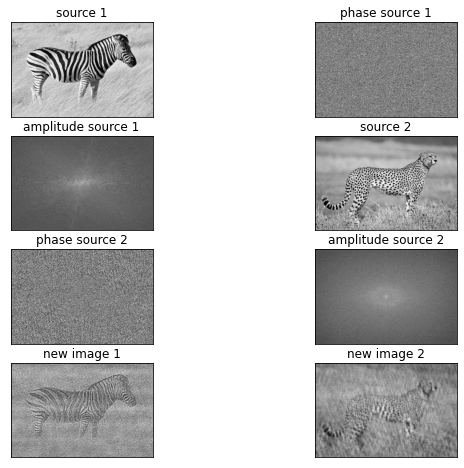

In [17]:
image_list = []
image1 = cv2.imread(os.path.join('images', '1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '2.jpg'), cv2.IMREAD_GRAYSCALE)

image_list.append([image1, 'source 1', 'img'])

phase1, amp1 = draw_phase_amplitude(image1)
image_list.append([phase1, 'phase source 1', 'img'])
image_list.append([amp1, 'amplitude source 1', 'img'])

image_list.append([image2, 'source 2', 'img'])

phase2, amp2 = draw_phase_amplitude(image2)
image_list.append([phase2, 'phase source 2', 'img'])
image_list.append([amp2, 'amplitude source 2', 'img'])

res1, res2 = change_phase_domain(image1, image2)
image_list.append([res1, 'new image 1', 'img'])
image_list.append([res2, 'new image 2', 'img'])

plotter(image_list, 4, 2, True, 10, 8, 'Q3')

# PART 4

**Point : 25 pts**

Here is for your helper functions(optional)

Implement this function for denoising input image and return the result image.

In [18]:
def denoise_image(image):
    '''
    Denoises the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    '''
    
    denoised = image.copy()
    
    #Write your code here
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    amp=np.log(np.abs(fshift))
    m,n=image.shape
    #print(m,n)
    for i in range(0,206):
        for j in range(0,512):
            fshift[i,j]=0
            fshift[j,i]=0
    for i in range(306,512):
        for j in range(0,512):
            fshift[i,j]=0
            fshift[j,i]=0
            

    denoised=np.real(np.fft.ifft2(np.fft.ifftshift(fshift)))

    return denoised

Test your implementation (dont change this cell)

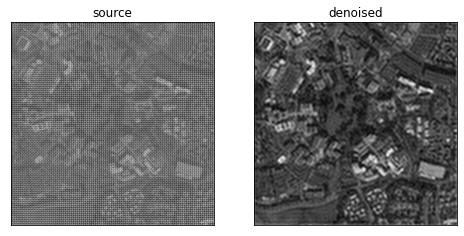

In [7]:
image_list = []
image = cv2.imread(os.path.join('images', '3.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
image_list.append([denoise_image(image), 'denoised', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

In [19]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

Implement this function for enhancing input image and return result image.

In [20]:
def enhance_image(image):
    '''
    Enhances the input image by applying a filter in the frequency domain.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result enhanced image.   
    '''
    
    enhanced = image.copy()
    
    #Write your code here
    r,c = image.shape
    #Write your code her
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    HighPassCenter = center * butterworthHP(20,image.shape,10)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)
    enhanced = np.array(enhanced,np.float64) + np.abs(inverse_HighPass)
    return enhanced

Test your implementation (dont change this cell)

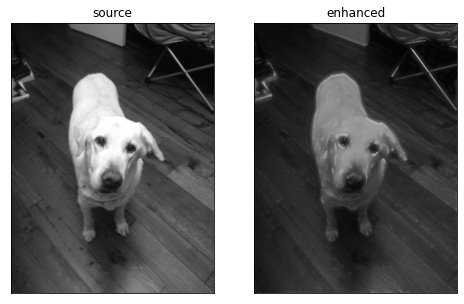

In [22]:
image_list = []
image = cv2.imread(os.path.join('images', '4.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source','img'])
i,j,k=enhance_image(image)
image_list.append([i, 'enhanced', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q5')

for create proper files for sending in quera run this cell.

In [23]:
!python notebook_converter.py

SyntaxError: invalid syntax (<ipython-input-128-b8b04f29c4a9>, line 1)

End!!!